In [65]:
import analysis as a
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
resonances = np.array([0.8,1.6,2.4,3.2,4.0])
print("Best diameters (micrometers):",a.invert_FSR_resonances(resonances))

Best diameters (micrometers): [274.69091292 137.34545646  91.56363764  68.67272823  54.93818258]


Central wavelength: 1556.755000000014
Offset: 9.835000000013906


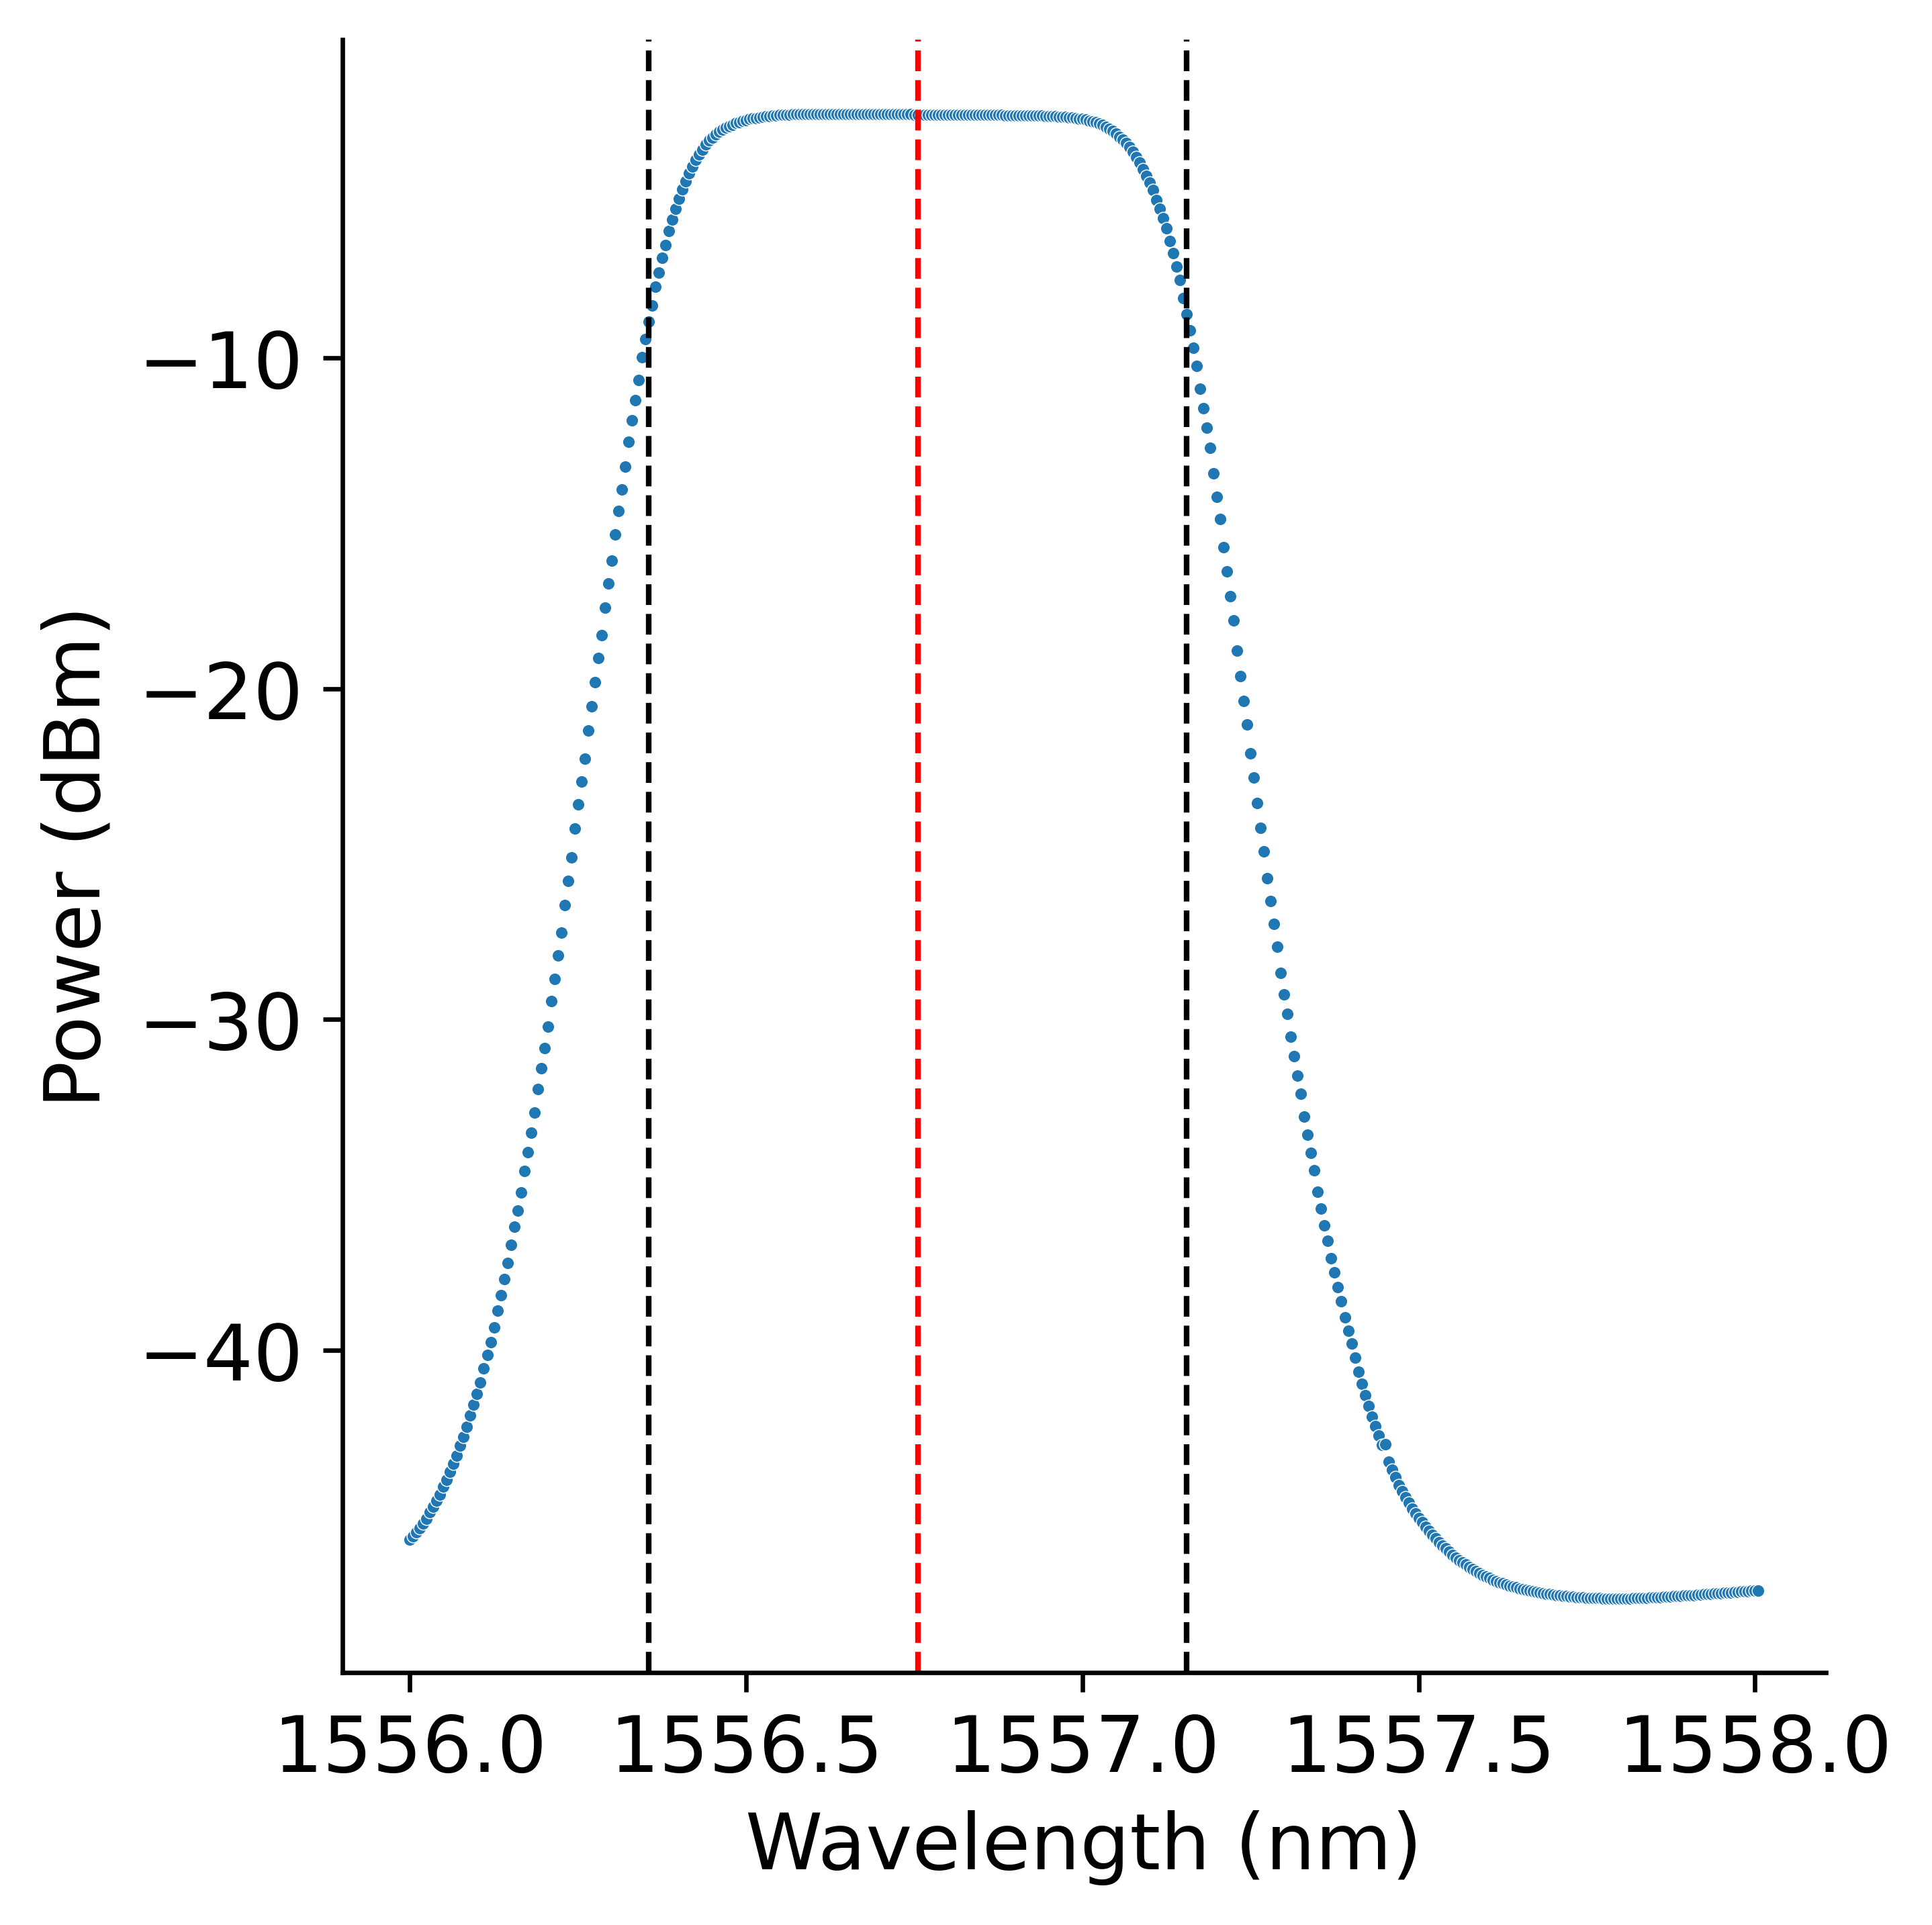

In [89]:
#find TUNICS laser offset
plt.rcParams["figure.dpi"]=600
plt.rcParams["font.size"]=14

path = r"C:\Users\pmesp\OneDrive\Documents\bristol-chip-experiment\Data\17-11-2022\17-11-2022_12-57_laser_sweep_samples_100_sensitivity_1547_TUNICS_1556_1558_402_WDM_SN_2020071009.txt"
tunics = pd.read_csv(path,index_col=0)
tunics["mean_dbm"] = tunics.mean(axis=1)
tunics["Wavelength(nm)"] = tunics.index
tunics["mean_dbm"].idxmax()
wavelength = tunics["mean_dbm"].idxmax()+0.12
print("Central wavelength:",wavelength)
print("Offset:",wavelength-1546.92)
plot = sns.relplot(data=tunics,x="Wavelength(nm)",y="mean_dbm",s=5)
plot.set_axis_labels("Wavelength (nm)", "Power (dBm)")
plt.axvline(wavelength,color='r',linestyle='--',linewidth=1)
width = 0.4
plt.axvline(wavelength-width,color='k',linestyle='--',linewidth=1)
plt.axvline(wavelength+width,color='k',linestyle='--',linewidth=1)
plt.show()

In [86]:
laser_offset = 9.835

path = "../Data/01-12-2022/01-12-2022_16-21_resonance_finding_samples_100_sensitivity_1550_TUNICS_3_angela_ring_11.txt"
path2 = "../Data/01-12-2022/01-12-2022_16-51_resonance_finding_samples_100_sensitivity_1550_TUNICS_3_angela_ring_11.txt"

data = pd.read_csv(path, index_col=0)
data2 = pd.read_csv(path2,index_col = 0)

frames = [data,data2]

df = pd.concat(frames)

df["mean_dbm"] = df.mean(axis=1)
df["variance"] = df.var(axis=1)
df["std"] = np.sqrt(df["variance"])
df.index-=laser_offset
df["Wavelength(nm)"] = df.index
powers = df["mean_dbm"]*-1
powers

wavelength_nm 
1531.835    19.101600
1531.837    19.093324
1531.839    19.085828
1531.841    19.080655
1531.843    19.077113
              ...    
1552.327    16.544758
1552.329    16.536944
1552.331    16.532246
1552.333    16.512474
1552.335    16.500391
Name: mean_dbm, Length: 2106, dtype: float64

[1560.61 1559.79 1558.98 1558.17 1557.36 1556.55 1555.75 1554.94 1554.13
 1553.33 1552.52 1551.72 1550.92 1550.12 1549.32 1548.51 1547.72 1546.92
 1546.12 1545.32 1544.53 1543.73 1542.94 1542.14 1541.35 1540.56 1539.77
 1538.98 1538.19 1537.4  1536.61 1535.82]


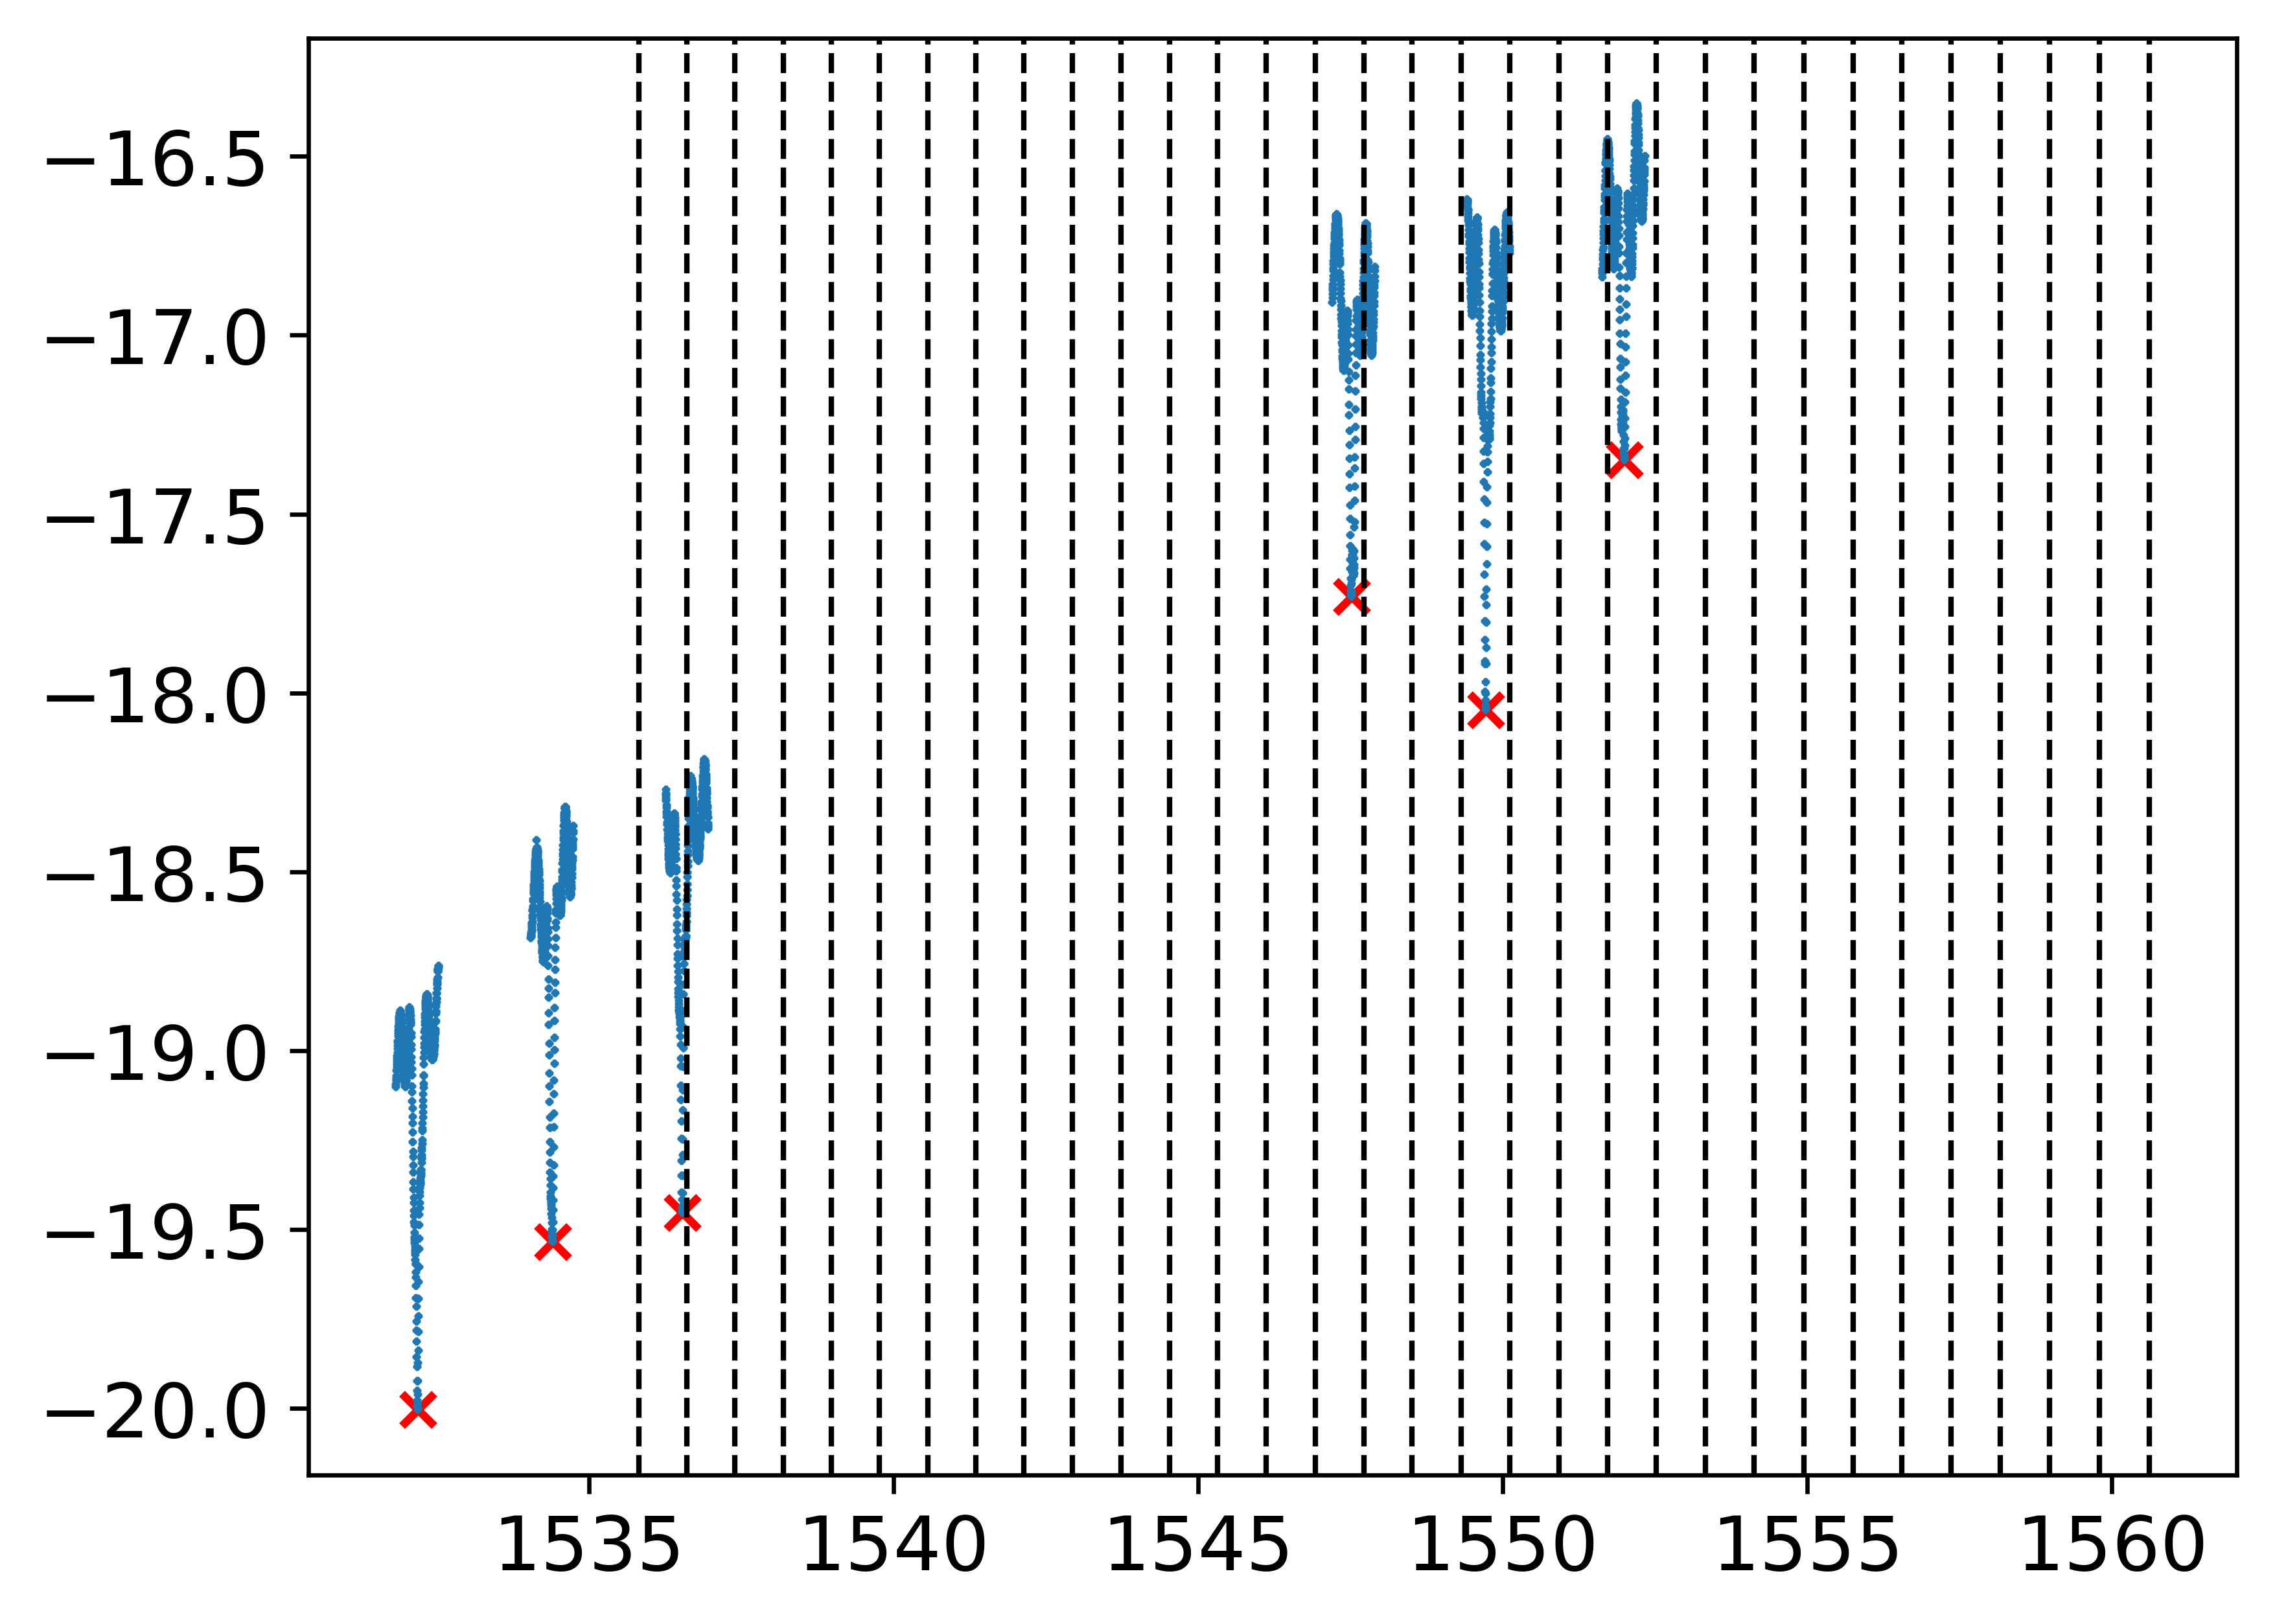

Resonances occuring at Float64Index([1532.19, 1534.4, 1536.53, 1547.52, 1549.72, 1552.0], dtype='float64', name='wavelength_nm ')


In [87]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


DWDM = a.get_DWDM_wavelengths()
print(DWDM)
minima,_ = find_peaks(powers.values, distance = 300)
minima
df['min'] = df.iloc[minima]['mean_dbm']
# # Plot results

plt.scatter(df.index, df['min'],marker='x',c='r')
plt.plot(df.index, df['mean_dbm'],'x',markersize=1)
for i in DWDM:
    plt.axvline(i,linestyle = '--',color='k',linewidth=1)
plt.show()

print(f"Resonances occuring at {np.round(df.index[minima],2)}")